# Hw4 Yousef Fadila

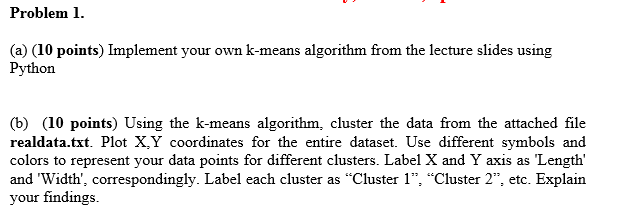

In [15]:
from IPython.display import Image
Image(filename='problem1.png') 

# a)

In [3]:
class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y        

In [4]:
import math
def getEuclideanDistance(a, b):
    distance = math.sqrt(math.pow((a.x-b.x), 2) + math.pow((a.y-b.y), 2))
    return distance

In [5]:
class Cluster(object):
    def __init__(self, point):
        self.points = []
        self.centroid = point

    def update(self, points):
        old_centroid = self.centroid
        self.points = points
        self.centroid = self.calcCentroid()
        change = getEuclideanDistance(old_centroid, self.centroid)
        return change

    def calcCentroid(self):
        xarr = [point.x for point in self.points]
        yarr = [point.y for point in self.points]
        x_center = sum(xarr)/len(self.points)
        y_center = sum(yarr)/len(self.points)
        return Point(x_center, y_center)

In [27]:
import random

def kmeans(points, k, threshold = 0.001,max_loops = 1000):

    clusters = []
    for i in range(0,k):
        x = random.random()
        y = random.random()
        c = Cluster(Point(x,y))
        clusters.append(c)

    loops = 0
    while loops < max_loops:
        lists = [[] for i in range(0, k)]
        loops += 1
        for p in points:
            # initlize sthe point as it belongs to the 1st cluster then find the mininum. 
            smallest_distance = getEuclideanDistance(p, clusters[0].centroid)
            clusterIndex = 0

            for i in range(1, k):
                distance = getEuclideanDistance(p, clusters[i].centroid)
                if distance <= smallest_distance:
                    smallest_distance = distance
                    clusterIndex = i
                    
            lists[clusterIndex].append(p)

        # update clusters and calc the change in the centroid 
        max_change = 0.0
        for i in range(0, k):
            change = clusters[i].update(lists[i])
            max_change = max(max_change, change)

        if max_change < threshold:
            print ("Converged after %s iterations" % loops)
            break

    return clusters

# b)


In [5]:
file = 'realdata.txt'
f = open(file)
points =[]
for line in iter(f):
    sline =[float(splits) for splits in line.split("\t") if splits is not ""]
    point = Point(sline[1], sline[2])
    points.append(point)
f.close()

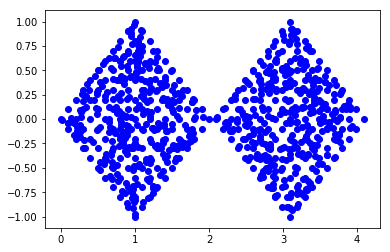

In [6]:
import matplotlib.pyplot as plt
xarr = [point.x for point in points]
yarr = [point.y for point in points]
plt.scatter(xarr,yarr,c="b")
plt.show()

Converged after 5 iterations


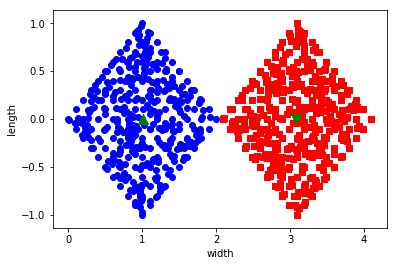

In [7]:
clusters = kmeans(points, 2)
xarr1 = [point.x for point in clusters[0].points]
yarr1 = [point.y for point in clusters[0].points]

xarr2 = [point.x for point in clusters[1].points]
yarr2 = [point.y for point in clusters[1].points]
plt.scatter(xarr1,yarr1,c="b",marker='o')
plt.scatter(xarr2,yarr2,c="r",marker='s')
# plot the centroids
plt.scatter(clusters[0].centroid.x,clusters[0].centroid.y,c="g",marker='^', s =100)
plt.scatter(clusters[1].centroid.x,clusters[1].centroid.y,c="g",marker='v', s= 100)
plt.xlabel("width")
plt.ylabel("length")
plt.show()

after plotting the points, we could notice that the points make a 2 diamond that are well separated, that gives us the intuition that the data consists of 2 clusters. 
therefore I run the code with k = 2. I have run the code multiple times and in all runs, the clusters coverage to the same two separate diamonds. 

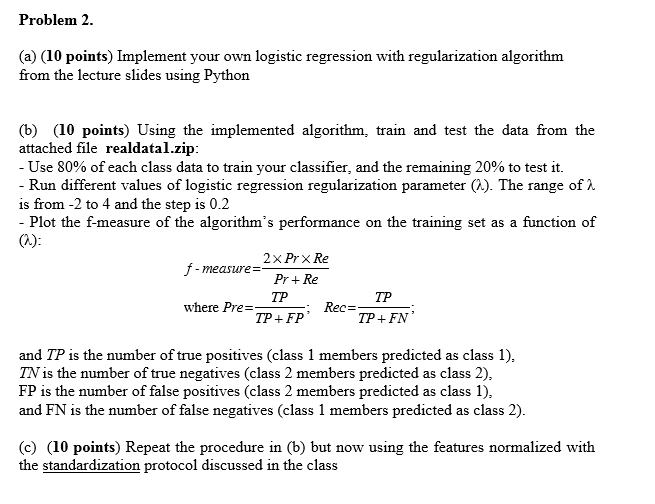

In [16]:
Image(filename='problem2.png') 

# a)

In [8]:
# Required Python Packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import *
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings("ignore")


In [98]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def h_of_w(w, x):
    T_w = w[:, None]
    return sigmoid(x.dot(T_w))


def cost_function_with_regularization(w, x, y, lamda):
    m = float(len(y))
    h_w = h_of_w(w, x)
    tol = .0000001
    h_w[h_w < tol] = tol
    h_w[(h_w > 1 - tol)] = 1 - tol
    #cost(h(x),y)=−ylog(h(x))−(1−y)log(1−h(x))
    regularization = (float(lamda)/2) * w**2
    J = (-1/m)*sum(y * np.log(h_w) + (1-y) * np.log(1-h_w)) + sum(regularization[1:])/m
    return J

def gradient(w, x, y, lamda):
    m = len(y)
    h_w = h_of_w(w, x)
    derivative_regularization = float(lamda) * w/m
    _gradient = (h_w - y).T.dot(x)/m + derivative_regularization.T
    _gradient[0][0] -= derivative_regularization[0]  
    
    return np.ndarray.flatten(_gradient)

def predict(weights, x):
    h_w = h_of_w(weights, x)
    return np.round(h_w)

# b)

## Preprocessing
The pre-processing phase was done in Weka
1) convert nominal to binary using nominal to binary filter
2) filling missing data with mode/mean 
3) save the data as CSV file instead of arff . 


-


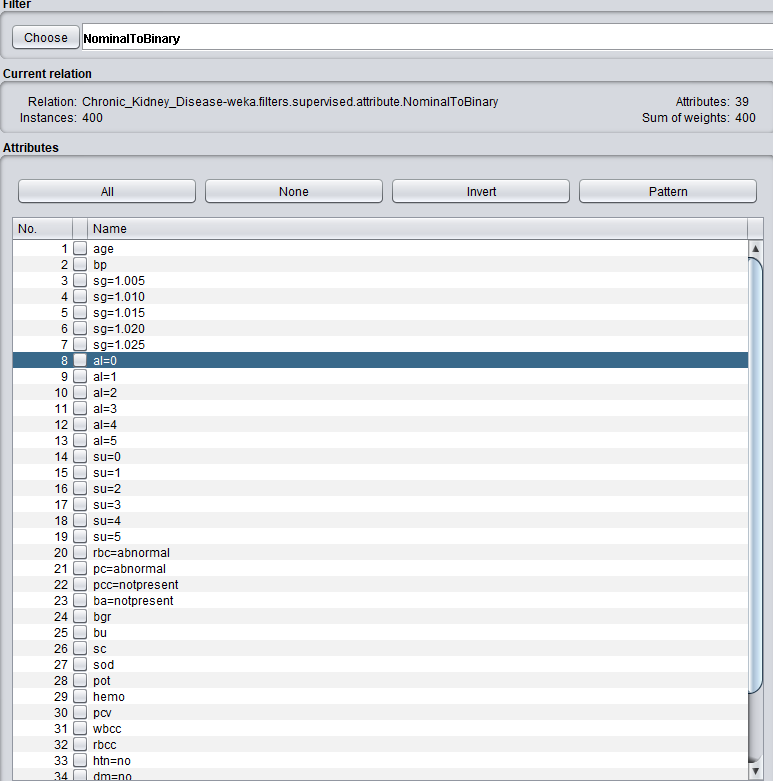

In [19]:
Image(filename='nominalTobinary.png') 

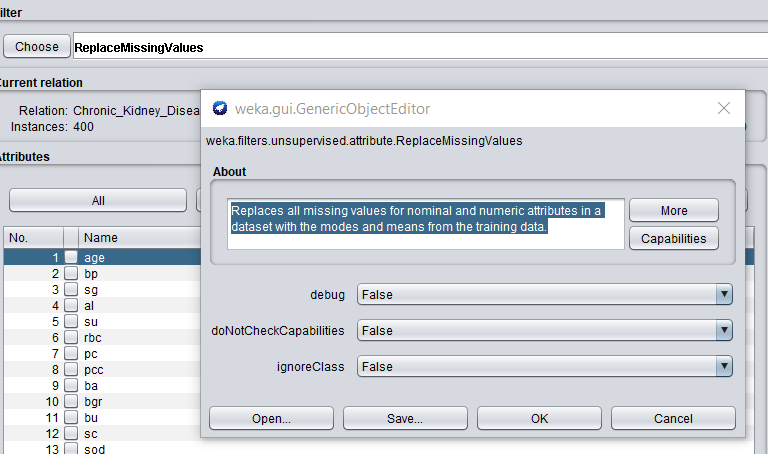

In [20]:
Image(filename='replacemissing.png') 

In [ ]:
csvfile ="chronic_kidney_disease_full.arff.csv"
dataset = pd.read_csv(csvfile)
train, test = train_test_split(dataset, test_size=0.2)
x_train = train.iloc[:,0:-1].values
y_train = train.iloc[:,-1].values
y_train = y_train[:, None]

x_test = test.iloc[:,0:-1].values
y_test = test.iloc[:,-1].values
y_test = y_test[:, None]

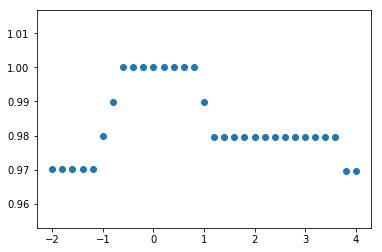

In [108]:
from scipy.optimize import fmin_bfgs
lambda_arr = np.arange(-2.0, 4.1, 0.2)
f_score_arr=[]
for lambda1 in lambda_arr:
    m, n = x_train.shape
    initial_weights = np.zeros(n)
    func_args = (x_train, y_train, lambda1)
    final_weights = fmin_bfgs(cost_function_with_regularization,  initial_weights, args=func_args, fprime=gradient, maxiter= 100, disp=False)
    p = predict(final_weights, x_test)
    f_score_arr.append(sklearn.metrics.f1_score(y_test, p))
plt.scatter(lambda_arr,f_score_arr)
plt.show()

# c)

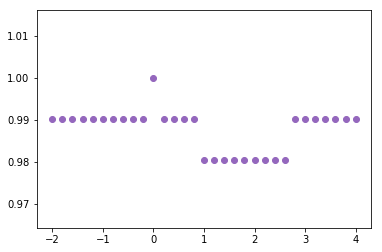

In [113]:
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_csv(csvfile)
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(dataset.values)
s_train, s_test = train_test_split(scaled_d, test_size=0.2)
x_strain = s_train[:,:-1]
y_strain = s_train[:,-1]
y_strain = y_strain[:, None]

x_stest = s_test[:,:-1]
y_stest = s_test[:,-1]
f_score_arr1=[]
for lambda1 in lambda_arr:
    m, n = x_strain.shape
    initial_weights = np.zeros(n)
    func_args1 = (x_strain, y_strain, lambda1)
    final_weights = fmin_bfgs(cost_function_with_regularization,  initial_weights, args=func_args1, fprime=gradient, maxiter= 100, disp=False)
    p = predict(final_weights, x_stest)
    f_score_arr1.append(sklearn.metrics.f1_score(y_stest, p))

plt.scatter(lambda_arr, f_score_arr1)
plt.show()

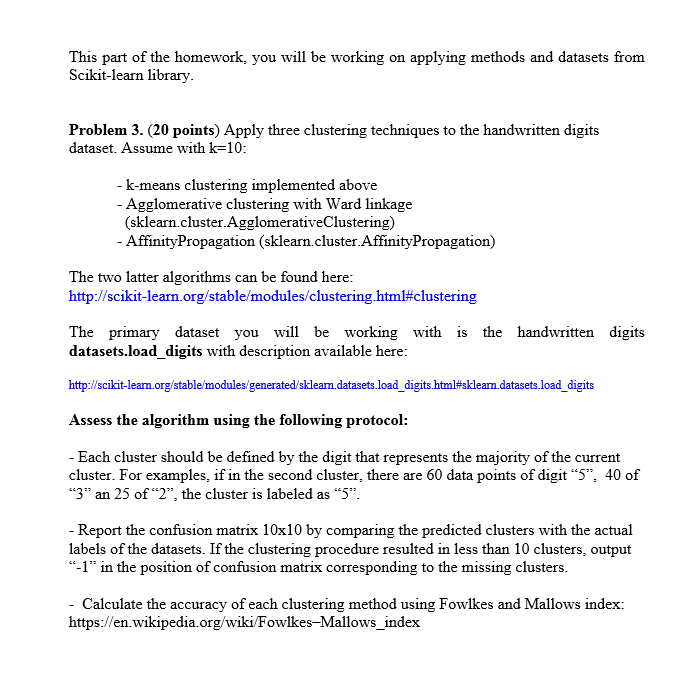

In [21]:
Image(filename='problem3.png') 

(1797, 64)


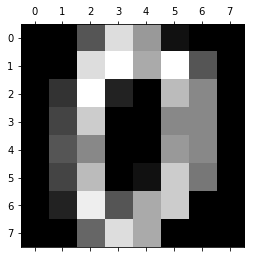

In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
digits = load_digits()
data = scale(digits.data)
print(data.shape)
pcadata = PCA(n_components=2).fit_transform(data)
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [37]:
n_digits = 10
labels = digits.target
cpoints=[]
for i in range(len(pcadata)):
    point = Point(pcadata[i][0], pcadata[i][1])
    point.target = digits.target[i]
    cpoints.append(point)

Converged after 31 iterations


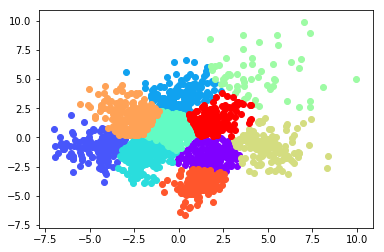

In [38]:
import matplotlib.cm as cm
# visualization of the cluster
kmean_clusters = kmeans(cpoints, n_digits)
x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))

for i in range (0,10):
    xarr = [point.x for point in kmean_clusters[i].points]
    yarr = [point.y for point in kmean_clusters[i].points]
    plt.scatter(xarr,yarr,c=colors[i])
plt.show()


In [29]:
# prepare the k_mean labels
kmean_true_labels = []
kmean_predicted_labels = []
for i in range(0, 10):
    kmean_true_labels.extend([p.target for p in kmean_clusters[i].points])
    kmean_predicted_labels.extend([i]* len(kmean_clusters[i].points))

In [41]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(linkage='ward', n_clusters=10)
agg_labels = ward.fit_predict(pcadata)
print("Number of clusters: ", np.unique(agg_labels).size)

Number of clusters:  10


In [31]:
from sklearn.cluster import AffinityPropagation

affp = AffinityPropagation()
aff_labels = affp.fit_predict(data)
print("Number of clusters: ", np.unique(aff_labels).size)

Number of clusters:  131


In [34]:
from collections import Counter
def adjust_labeles(labels, true_target):
    cluster_labels=[]
    n_clusters = np.unique(labels).size
    for i in range (0, n_clusters):
        loc_array = [pos for pos,value in enumerate(labels) if value == i]
        lbl_array = [true_target[i] for i in loc_array]
        # get the most occurance value in cluster
        most_occures = Counter(lbl_array).most_common(1)[0][0]
        cluster_labels.append(most_occures)
    adjusted_labels = [cluster_labels[i] for i in labels]
    return adjusted_labels

In [56]:
#this version implement the suggested change on https://github.com/scikit-learn/scikit-learn/issues/9515 
from sklearn.metrics.cluster import contingency_matrix
def fowlkes_mallows_score_(labels_true, labels_pred):
    n_samples, = labels_true.shape
    c = contingency_matrix(labels_true, labels_pred, sparse=True)
    tk = np.dot(c.data, c.data) - n_samples
    pk = np.sum(np.asarray(c.sum(axis=0)).ravel() ** 2) - n_samples
    qk = np.sum(np.asarray(c.sum(axis=1)).ravel() ** 2) - n_samples
    return np.sqrt(tk / pk) * np.sqrt(tk / qk) if tk != 0. else 0.

In [61]:
from sklearn.metrics import confusion_matrix

adjusted_agg_labels = adjust_labeles(agg_labels,digits.target)
cf = confusion_matrix(digits.target, adjusted_agg_labels)
print('\nconfusion matrix - AgglomerativeClustering')
print(cf)
print("fowlkes-mallows score", fowlkes_mallows_score_(digits.target, adjusted_agg_labels))

adjustes_kmean_labels = adjust_labeles(kmean_predicted_labels,kmean_true_labels)
cf = confusion_matrix(kmean_true_labels, adjustes_kmean_labels)
print('\n confusion matrix - kmean')
print(cf)
print("fowlkes-mallows score", fowlkes_mallows_score_(digits.target, adjustes_kmean_labels))


adjusted_aff_labels = adjust_labeles(aff_labels, digits.target)
cf = confusion_matrix(digits.target, adjusted_aff_labels)
print('\n confusion matrix - AffinityPropagation')
print(cf)
print("fowlkes-mallows score", fowlkes_mallows_score_(digits.target, adjusted_aff_labels))



confusion matrix - AgglomerativeClustering
[[123  16   1   0   1   0  35   0   0   2]
 [  0  74  22   0   0   0   1  69   0  16]
 [  0   6 128  16   0   0   0   6   0  21]
 [  2   1  53  76   0   0   0  19   0  32]
 [ 29   5   0   2 135   0   0  10   0   0]
 [  5  27   7  67   1   0   0  39   0  36]
 [ 25   0   0   0   0   0 156   0   0   0]
 [  0   8   0   8   0   0   0 163   0   0]
 [  0  51   6  25   0   0   0  40   0  52]
 [  0  15  19  27   0   0   0  41   0  78]]
fowlkes-mallows score 0.395389699833

 confusion matrix - kmean
[[129   8   0   0   5   0  33   0   1   2]
 [  5  76   0   0   0   0   2  10  62  27]
 [  1   8 107  16   0   0   0   1  10  34]
 [  4   0  38  76   0   0   0  15   8  42]
 [ 11   9   0   2 150   0   0   8   1   0]
 [  8  15   2  60   1   0   0  13  59  24]
 [ 27   1   0   0   0   0 153   0   0   0]
 [  0  11   0  12   0   0   0 149   7   0]
 [  6  30   2  25   0   0   0  10  75  26]
 [  2   8   7  15   0   0   0  29  61  58]]
fowlkes-mallows score 0.103424

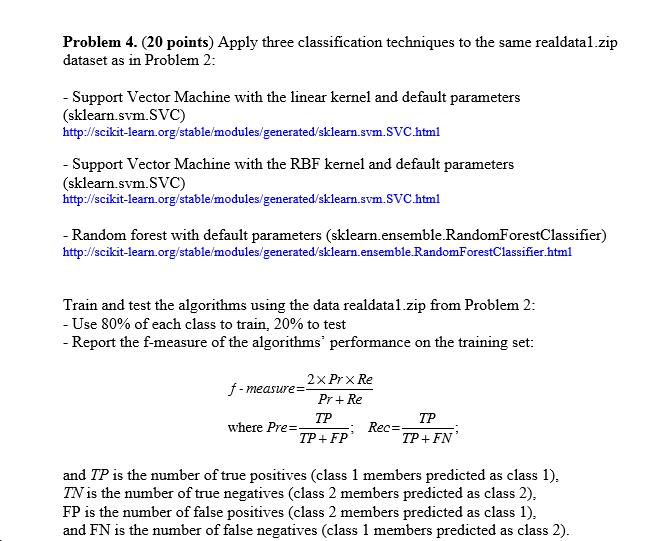

In [22]:
Image(filename='problem4.png') 

In [9]:
# copy the loading/split from question 2 
csvfile ="chronic_kidney_disease_full.arff.csv"
dataset = pd.read_csv(csvfile)
train, test = train_test_split(dataset, test_size=0.2)
x_train = train.iloc[:,0:-1].values
y_train = train.iloc[:,-1].values
x_test = test.iloc[:,0:-1].values
y_test = test.iloc[:,-1].values

In [10]:
from sklearn.svm import SVC
clf_linear = SVC(kernel='linear')
clf_linear.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [13]:
# generate the labels, report accurcy of three methods
res_clf_linear = clf_linear.predict(x_test)
print ('res_clf_linear Accuracy: ', sklearn.metrics.accuracy_score(y_test, res_clf_linear) * 100)
res_clf_rbf = clf_rbf.predict(x_test)
print ('res_clf_rbf Accuracy: ', sklearn.metrics.accuracy_score(y_test, res_clf_rbf) * 100)
res_rfc = rfc_clf.predict(x_test)
print ('rfc Accuracy: ', sklearn.metrics.accuracy_score(y_test, res_rfc)* 100)

res_clf_linear Accuracy:  97.5
res_clf_rbf Accuracy:  57.5
rfc Accuracy:  100.0


In [47]:
# report the f1 score as it required in the question 
print ('res_clf_linear f1_score: ', sklearn.metrics.f1_score(y_test, res_clf_linear))
print ('res_clf_rbf f1_score: ', sklearn.metrics.f1_score(y_test, res_clf_rbf))
print ('rfc f1_score: ', sklearn.metrics.f1_score(y_test, res_rfc))

res_clf_linear f1_score:  0.977777777778
res_clf_rbf f1_score:  0.730158730159
rfc f1_score:  1.0
